In [1]:
import train

%load_ext autoreload
%autoreload 2

/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dburnham/miniconda3/envs/rnn_mult/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dburnham/miniconda3/envs/

In [2]:
train.train(model_dir='train_all_params_multidelay', 
            hp={'learning_rate': 0.001, 
                'n_rnn': 1024,#512, 16384,8192,1024
                'w_rec_init': 'randgauss',#'randortho'
                'rule_strength': 0.0,
                'no_rule': True,
                'target_perf':1.0,
                'activation': 'softplus',
                'alpha':0.2},
            ruleset='all',
            rule_trains = ['multidelaydm'])#,trainables='bias')


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
batch_size_train     = 64
batch_size_test      = 512
in_type              = normal
rnn_type             = LeakyRNN
use_separate_input   = False
loss_type            = lsq
optimizer            = adam
activation           = softplus
tau                  = 100
dt                   = 20
alpha                = 0.2
sigma_rec            = 0.05
sigma_x              = 0.01
w_rec_init           = randgauss
w_in_init            = randgauss
w_out_init           = glorot_uniform
b_rec_init           = zeros
b_out_init           = zeros
l1_h                 = 0
l2_h                 = 0
l1_weight            = 0
l2_weight            = 0
l2_weight_init       = 0
p_weight_train       = None
target_perf          = 1.0
n_eachring           = 32
num_ring             = 2
n_rule               = 20
rule_start           = 65
n_input             

2024-08-09 17:02:00.540509: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-08-09 17:02:00.575907: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2024-08-09 17:02:00.581284: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5606e4ecb720 executing computations on platform Host. Devices:
2024-08-09 17:02:00.581321: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2024-08-09 17:02:00.797681: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5606e4ed16d0 executing computations on platform CUDA. Devices:
2024-08-09 17:02:00.797731: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2024-08-09 17:02:00.797743: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (1): Quadro 

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(1109, 1024) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
Trial       0  | Time 1.12 s  | Now training multidelaydm


2024-08-09 17:02:01.719230: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


multidelaydm   | cost 1.224771| c_reg 0.000000  | perf 0.00
Model saved in file: train_all_params_multidelay/model.ckpt
Trial   32000  | Time 54.56 s  | Now training multidelaydm
multidelaydm   | cost 0.492012| c_reg 0.000000  | perf 0.22
Model saved in file: train_all_params_multidelay/model.ckpt
Trial   64000  | Time 102.85 s  | Now training multidelaydm
multidelaydm   | cost 0.499642| c_reg 0.000000  | perf 0.19
Model saved in file: train_all_params_multidelay/model.ckpt
Trial   96000  | Time 152.93 s  | Now training multidelaydm
multidelaydm   | cost 0.322252| c_reg 0.000000  | perf 0.24
Model saved in file: train_all_params_multidelay/model.ckpt
Trial  128000  | Time 204.74 s  | Now training multidelaydm
multidelaydm   | cost 0.284610| c_reg 0.000000  | perf 0.20
Model saved in file: train_all_params_multidelay/model.ckpt
Trial  160000  | Time 256.66 s  | Now training multidelaydm
multidelaydm   | cost 0.258002| c_reg 0.000000  | perf 0.22
Model saved in file: train_all_params_mul

In [7]:
from network import Model
import tensorflow as tf

pre_trained_model = Model('train_all_params_multidelay')

with tf.Session() as sess:
    pre_trained_model.restore()
    # get all connection weights and biases as tensorflow variables
    var_list = pre_trained_model.var_list
    # evaluate the parameters after training
    pre_trained_params = [sess.run(var) for var in var_list]
    # get name of each variable
    pre_trained_params_names  = [var.name for var in var_list]

print(pre_trained_params_names)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from train_all_params_multidelay/model.ckpt
Model restored from file: train_all_params_multidelay/model.ckpt
['rnn/leaky_rnn_cell/kernel:0', 'rnn/leaky_rnn_cell/bias:0', 'output/weights:0', 'output/biases:0']


2024-08-09 09:30:32.836878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 09:30:32.836933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 09:30:32.836938: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 09:30:32.836941: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 09:30:32.836943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 09:30:32.837044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 09:30:32.837326: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Overwrite original dt with 1.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(323, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from train_all_params/model.ckpt
Model restored from file: train_all_params/model.ckpt


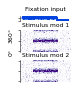

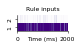

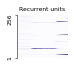

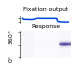

In [4]:
import tools
from analysis import performance
from analysis import standard_analysis
from analysis import clustering
from analysis import variance
from analysis import taskset
from analysis import varyhp
from analysis import data_analysis
from analysis import contextdm_analysis
from analysis import posttrain_analysis

standard_analysis.schematic_plot(model_dir='train_all_params', rule='contextdm1')

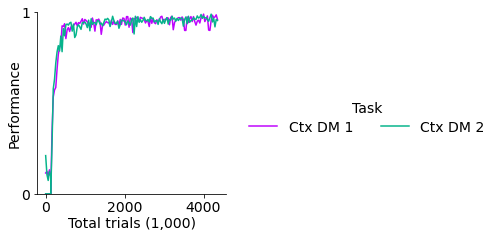

In [9]:
performance.plot_performanceprogress(model_dir='train_all_params')

In [4]:
train.train(model_dir='retrain_rnnbias_outputlayer_contextdm1', 
            hp={'learning_rate': 0.001, 
                'n_rnn': 1024,#1024, 16384,8192
                'b_rec_init': 'uniform',
                # 'w_rec_init': 'randgauss',#'randortho'
                'rule_strength': 0.0,
                'no_rule': True,
                'target_perf':0.98,
                'activation': 'softplus',
                'alpha':0.2},#'relu'
            ruleset='all',
            rule_trains = ['contextdm1'],#'fdgo',contextdm1,dm1,dmsgo
            pretrained_dir = 'train_all_params_multidelay',
            apply_pretrained_params = ['rnn/leaky_rnn_cell/kernel:0','output/weights:0','output/biases:0'],#initialize ins and rec weights
            trainables='rnn_bias_and_output_layer')


INFO:tensorflow:Restoring parameters from train_all_params_multidelay/model.ckpt


2024-08-09 17:55:06.654428: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 17:55:06.654497: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 17:55:06.654501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 17:55:06.654505: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 17:55:06.654520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 17:55:06.654639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 17:55:06.654860: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Model restored from file: train_all_params_multidelay/model.ckpt
batch_size_train     = 64
batch_size_test      = 512
in_type              = normal
rnn_type             = LeakyRNN
use_separate_input   = False
loss_type            = lsq
optimizer            = adam
activation           = softplus
tau                  = 100
dt                   = 20
alpha                = 0.2
sigma_rec            = 0.05
sigma_x              = 0.01
w_rec_init           = [[ 0.13653165 -0.10874186 -0.08851403 ... -0.21479842 -0.08225694
  -0.16772223]
 [-0.07662565 -0.09931163 -0.06426609 ... -0.08459357 -0.10583629
  -0.06098421]
 [-0.06484535 -0.07599788 -0.09538527 ... -0.08452167 -0.132615
   0.00125962]
 ...
 [-0.06285541 -0.08552465 -0.09795533 ... -0.03408048 -0.06164267
  -0.08364829]
 [-0.01662019 -0.09928936 -0.06111877 ... -0.05880495 -0.1352779
   0.05953628]
 [-0.03675343 -0.05482562 -0.07251727 ... -0.07776637 -0.14663838
   0.28555685]]
w_in_init            = [[ 0.42963073 -0.01981662  0.0808

2024-08-09 17:55:07.003831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1512] Adding visible gpu devices: 0, 1
2024-08-09 17:55:07.003871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:984] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-09 17:55:07.003876: I tensorflow/core/common_runtime/gpu/gpu_device.cc:990]      0 1 
2024-08-09 17:55:07.003880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 0:   N Y 
2024-08-09 17:55:07.003882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1003] 1:   Y N 
2024-08-09 17:55:07.003968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15203 MB memory) -> physical GPU (device: 0, name: Quadro RTX 5000, pci bus id: 0000:af:00.0, compute capability: 7.5)
2024-08-09 17:55:07.004169: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 15203 M

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(1024,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(1024, 33) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32_ref>
Trial       0  | Time 0.25 s  | Now training contextdm1
contextdm1     | cost 0.577675| c_reg 0.000000  | perf 0.26
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   32000  | Time 34.42 s  | Now training contextdm1
contextdm1     | cost 0.204557| c_reg 0.000000  | perf 0.32
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   64000  | Time 69.35 s  | Now training contextdm1
contextdm1     | cost 0.200078| c_reg 0.000000  | perf 0.32
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial   96000  | Time 104.48 s  | Now training contextdm1
contextdm1     | cost 0.204793| c_reg 0.000000  | perf 0.36
Model saved in file: retrain_rnnbias_outputlayer_contextdm1/model.ckpt
Trial  128000  | 